#
РЕШЕНИЕ СИСТЕМ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ 
ПРЯМЫМИ МЕТОДАМИ. ТЕОРИЯ ВОЗМУЩЕНИЙ


### Задание 3.1
N = 34  K = 1  
1. Решение с помощью LU модифицирует исходную матрицу А; 
2. Решение с помощью LU по схеме частичного выбора реализовано в виде двух функций, одна из которых возвращает две матрицы – L и U, не $A_{ij} = tg(i +1)^(17-j)$  
В сравнении погрешностей буду испольовать норму $||X||_e$


In [127]:
import numpy as np 
import matplotlib.pyplot as plt 
import sympy as sp 
import math
#Импорт удобного пакета обработки n-мерных массивов
import numpy as np
#Построение графиков
from matplotlib import pyplot as plt
#Сравним результаты
from scipy import linalg


Зададим исходные данные:

In [128]:
#Зададим матрицу и вектор b
A_def = np.array([
             [((np.tan)(i +1)**(17-j)) for j in range(5)] 
             for i in range(5)]
             )
#Х точное
x_def = np.array([17]*5)
#b Точное
b_def = A_def @ x_def
#b возмущенное
b = b_def
b[0] += 1e-3 
#A возмущенное
A = np.copy(A_def)
A[0][0] += 1e-3 
A

array([[ 1.86569114e+03,  1.19794586e+03,  7.69192191e+02,
         4.93892626e+02,  3.17124808e+02],
       [-5.89941838e+05,  2.69991339e+05, -1.23563576e+05,
         5.65498039e+04, -2.58804450e+04],
       [-4.14251151e-15,  2.90607644e-14, -2.03868602e-13,
         1.43018973e-12, -1.00331421e-11],
       [ 1.20755238e+01,  1.04295231e+01,  9.00788688e+00,
         7.78003221e+00,  6.71954501e+00],
       [-9.83351440e+08,  2.90888057e+08, -8.60484441e+07,
         2.54542411e+07, -7.52969328e+06]])

1.Реализовать метод решения СЛАУ с помощью LU разложения 

2.Реализовать метод решения СЛАУ с помощью LU разложения по схеме частичного выбора

In [118]:
#Функция которая модифицирует исходную матрицу
#А потом считает ответи используя матрицу
def solve_lu(A,b):
    my_A = np.copy(A)
    n = my_A.shape[0]
    for k in range(n):
        for i in range(k+1,n):
            my_A[i][k] /= my_A[k][k]
            for j in range(k+1,n):
                my_A[i][j] -= my_A[i][k] * my_A[k][j]

    y = np.zeros(n)
    x = np.zeros(n)

    for i in range(n):
        y[i] = b[i] - np.sum([my_A[i][j]*y[j] for j in range(i)])
    for i in range(n-1,-1,-1):
        x[i] = (y[i] - np.sum([x[j]*my_A[i][j] for j in range(n-1,i-1,-1)]))/my_A[i][i]

    return x


#Функция которая получает LU разложение и матрицу перестановок
def create_lup(A):
    n = A.shape[0]
    my_l = np.eye(n)
    my_u = np.copy(A)
    my_p = np.eye(n)   
    for k in range(n - 1):
        p_k = np.eye(n)
        u_k = np.eye(n)
        l_k = np.eye(n)
        max_elem = my_u[k][k].copy()
        i_max = k 
        for i in range (k + 1, n):
            if abs(max_elem) < abs(my_u[i][k]):
                max_elem = my_u[i][k].copy()
                i_max = i
        p_k[i_max], p_k[k] = np.copy(p_k[k]), np.copy(p_k[i_max])
        my_u = p_k @ my_u
        for i in range(k + 1, n):
            c = my_u[i][k] / my_u[k][k]
            u_k[i][k] = -c
            l_k[i][k] = c
        my_u = u_k @ my_u 
        my_p = p_k @ my_p
        my_l = my_l @ p_k @ l_k
    
    my_l = my_p @ my_l  
    return (my_l, my_u, my_p)

#Функция которая считает ответ с помощью LU и матрицы перестановок
def solve_lup(L, U, P, b):
    b = P @ b
    n = L.shape[0]
    y = np.zeros(n)
    x = np.zeros(n)

    for i in range(n):
         y[i] = b[i] - np.sum([L[i][j]*y[j] for j in range(i)])
    for i in range(n-1,-1,-1):
        x[i] = (y[i] - np.sum([x[j]*U[i][j] for j in range(n-1,i-1,-1)]))/U[i][i]
    return x

In [119]:
def delta_x(x, x_def):
    return linalg.norm(x - x_def, ord = 2)/linalg.norm(x, ord = 2)

def delta_x_score(A):
    return np.linalg.cond(A)*(1e-3/linalg.norm(A,ord = 2))

3. Решить систему A*x=b , размера 5x5, двумя методами.

In [120]:
x1 = solve_lu(A,b)
l1, u1, p1 = create_lup(A)
x2 = solve_lup(l1, u1, p1, b)
print(x1)
print(x2)
#print(linalg.solve(A,b))
#Напомню верный ответ
print(x_def)

[16.99999598 16.99998171 16.99999369 17.00003383 17.0000049 ]
[16.99999598 16.99998171 16.99999369 17.00003383 17.0000049 ]
[17 17 17 17 17]


4. Вычислить погрешность и сравнить ее с теоретической оценкой. Для вычисления обратной матрицы можно воспользоваться встроенными функциями

In [121]:
#Число обусловленности матрицы A. 
print(np.linalg.cond(A))
#Оценка погрешности delta x
print(delta_x_score(A))
#Погрешность delta x
print(delta_x(x2,x_def))

1.2517752200432609e+20
121600062.68347159
1.0387678411811687e-06


Из-за возмущения в матрице мы получили очень большое число обусловленности. Поэтому мы получили возмущенное решение, сильно отличающееся от оригинала.

5. Задавая вектор b  как b=Ax , где x=N , решить систему обоими методам для размера матрицы n = 5,...,15 .

In [122]:
#Сюда будем записывать погрешности
delta_x1 = []
delta_x2 = []
delta_x3 = []
#начинаем запись
for n in range(5,16):
    A_def = np.array([
             [(np.tan)(i +1)**(17-j) for j in range(n)] 
             for i in range(n)]
             )
    #Х точное
    x_def = np.array([17]*n)
    #b Точное
    b = A_def @ x_def
    #A возмущенное
    A = np.copy(A_def)
    A[0][0] += 1e-3 
    x1 = solve_lu(A,b)
    l,u,p = create_lup(A)
    x2 = solve_lup(l,u,p,b)
    #Рассмотрим так же встроеное решение
    x3 = linalg.solve(A,b)
    delta_x1.append(delta_x(x1,x_def))
    delta_x2.append(delta_x(x2,x_def))
    delta_x3.append(delta_x(x3,x_def))

<ipython-input-122-75af13b717dd>:22: LinAlgWarning: Ill-conditioned matrix (rcond=4.50211e-21): result may not be accurate.
  x3 = linalg.solve(A,b)
<ipython-input-122-75af13b717dd>:22: LinAlgWarning: Ill-conditioned matrix (rcond=4.40361e-21): result may not be accurate.
  x3 = linalg.solve(A,b)
<ipython-input-122-75af13b717dd>:22: LinAlgWarning: Ill-conditioned matrix (rcond=2.31967e-20): result may not be accurate.
  x3 = linalg.solve(A,b)
<ipython-input-122-75af13b717dd>:22: LinAlgWarning: Ill-conditioned matrix (rcond=1.17535e-24): result may not be accurate.
  x3 = linalg.solve(A,b)
<ipython-input-122-75af13b717dd>:22: LinAlgWarning: Ill-conditioned matrix (rcond=2.34561e-24): result may not be accurate.
  x3 = linalg.solve(A,b)
<ipython-input-122-75af13b717dd>:22: LinAlgWarning: Ill-conditioned matrix (rcond=1.09822e-23): result may not be accurate.
  x3 = linalg.solve(A,b)
<ipython-input-122-75af13b717dd>:22: LinAlgWarning: Ill-conditioned matrix (rcond=1.05084e-48): result may

6. Построить на одном графике погрешности обоих методов как функций, зависящих от  . Прокомментировать полученный результат.

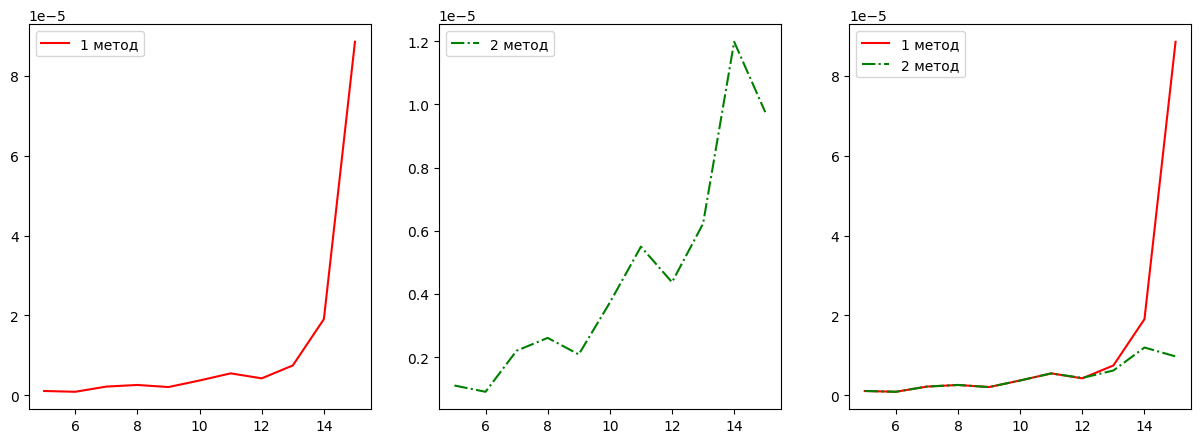

In [123]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
#А теперь построим графика
axs[0].plot(range(5,16),delta_x1,color = 'red', ls = 'solid',label = '1 метод')
axs[1].plot(range(5,16),delta_x2,color = 'green', ls = 'dashdot',label = '2 метод')
axs[2].plot(range(5,16),delta_x1,color = 'red', ls = 'solid',label = '1 метод')
axs[2].plot(range(5,16),delta_x2,color = 'green', ls = 'dashdot',label = '2 метод')
axs[0].legend()
axs[1].legend()
axs[2].legend()




Анализируя результаты можно заметить, что получаемые погрешности у методов приблизительно равны. При увеличении размерности матрицы мы можем увидеть, что значение погрешности увеличивается. Это происходит из-за того, что при большей размерности придется выполнить больше операций для получения решения, поэтому погрешность получается больше


### Задание 3.2

1. Задать матрицу A с учетом структуры матрицы: все ненулевые элементы матрицы равны N ( номеру варианта), элементы главной диагонали равны  N*m+m/N,  m- размерность матрицы
2.Разработать  и реализовать алгоритм решения системы с данной матрицей А  прямым методом  с учетом нулевых элементов
3. Для нахождения обратной матрицы использовать следующий алгоритм: решать системы $Ax^j=E^j$  , где   $〖 E〗^j$  - столбцы единичной матрицы порядка m. Из  полученных столбцов сформировать обратную матрицу  $ A^(-1)=(x^1 x^2…x^m ) $ 
4. Найти число обусловленности матрицы, используя евклидову норму.
5. Ответить на вопросы: 1. Является ли матрица хорошо обусловленной? 2. Какова трудоемкость полученного метода?      


In [126]:
import numpy as np


def create():
    n = 20
    variant = 34
    diagonal = variant * n + n / variant
    a = np.zeros((n, n))
    for i in range(4):
        for j in range(4):
            if i == j:
                a[i][j] = diagonal
            else:
                a[i][j] = variant
    for i in range(4, 8):
        for j in range(4, n):
            if i == j:
                a[i][j] = diagonal
            else:
                a[i][j] = variant
    for i in range(8, 11):
        for j in range(8, 11):
            if i == j:
                a[i][j] = diagonal
            else:
                a[i][j] = variant
    for i in range(11, 15):
        for j in range(0, 15):
            if i == j:
                a[i][j] = diagonal
            else:
                a[i][j] = variant
    for i in range(15, 20):
        for j in range(15, 20):
            if i == j:
                a[i][j] = diagonal
            else:
                a[i][j] = variant
    return a


def printf(a):
    n = len(a)
    for i in range(n):
        for j in range(n):
            print(str(round(a[i][j], 7)).ljust(7), end=' ')
        print()
    print(end='\n\n')


def printv(v):
    n = len(v)
    for i in range(n):
        print(str(round(v[i], 5)).ljust(5), end=' ')
    print(end='\n\n')


def evk_norm(a):
    s = 0
    n = len(a)
    for i in range(n):
        for j in range(n):
            s += (a[i][j] ** 2)
    return np.sqrt(s)


def split_matrix(a, b):
    a1 = np.zeros((4, 4))
    b1 = np.zeros(4)
    a2 = np.zeros((3, 3))
    b2 = np.zeros(3)
    a3 = np.zeros((8, 8))
    b3 = np.zeros(8)
    a4 = np.zeros((5, 5))
    b4 = np.zeros(5)
    for i in range(4):
        b1[i] = b[i]
        for j in range(4):
            a1[i][j] = a[i][j]
    for i in range(8, 11):
        b2[i - 8] = b[i]
        for j in range(8, 11):
            a2[i - 8][j - 8] = a[i][j]
    for i in range(15, 20):
        b4[i - 15] = b[i]
        for j in range(15, 20):
            a4[i - 15][j - 15] = a[i][j]

    for i in range(4, 8):
        b3[i - 4] = b[i]
        for j in range(4, 8):
            a3[i - 4][j - 4] = a[i][j]
    for i in range(4, 8):
        for j in range(11, 15):
            a3[i - 4][j - 7] = a[i][j]
    for i in range(11, 15):
        b3[i - 7] = b[i]
        for j in range(4, 8):
            a3[i - 7][j - 4] = a[i][j]
    for i in range(11, 15):
        for j in range(11, 15):
            a3[i - 7][j - 7] = a[i][j]

    return a1, b1, a2, b2, a3, b3, a4, b4


def Gauss_help(a, b):
    n = len(a)
    for k in range(0, n - 1):
        for i in range(k + 1, n):
            w = a[i][k] / a[k][k]
            b[i] -= b[k] * w
            for j in range(n):
                a[i][j] -= (a[k][j] * w)
    x = np.zeros(n)
    x[n - 1] = b[n - 1] / a[n - 1][n - 1]
    for i in range(n - 2, -1, -1):
        x[i] = b[i] / a[i][i]
        for j in range(n - 1, i, -1):
            x[i] -= (a[i][j] / a[i][i] * x[j])
    return x


def Gauss(a, b):
    a1, b1, a2, b2, a3, b3, a4, b4 = split_matrix(a, b)
    x1 = Gauss_help(a1, b1)
    x2 = Gauss_help(a2, b2)
    x4 = Gauss_help(a4, b4)
    for i in range(4):
        for j in range(4):
            b3[i + 4] -= a[i + 11][j] * x1[j - 4]
        for j in range(15, 20):
            b3[i] -= a[i + 4][j] * x4[j - 15]
        for j in range(8, 11):
            b3[i] -= a[i + 4][j] * x2[j - 8]
            b3[i + 4] -= a[i + 11][j] * x2[j - 8]

    x3 = Gauss_help(a3, b3)
    x = np.zeros(20)
    for i in range(20):
        if i < 4:
            x[i] = x1[i]
        elif 4 <= i < 8:
            x[i] = x3[i - 4]
        elif 8 <= i < 11:
            x[i] = x2[i - 8]
        elif 11 <= i < 15:
            x[i] = x3[i - 7]
        else:
            x[i] = x4[i - 15]
    return x


def inverse_matrix(a):
    n = len(a)
    inv = np.zeros((n, n))
    for i in range(n):
        Ei = np.zeros(n)
        Ei[i] = 1
        inv[i] = Gauss(a, Ei)
    return inv


n = 20
variant = 34
a = create()
print()
print('Исходная матрица А')
printf(a)
inv = inverse_matrix(a)
condA = evk_norm(a) * evk_norm(inv)
print(condA)



Исходная матрица А
680.5882353 34.0    34.0    34.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     
34.0    680.5882353 34.0    34.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     
34.0    34.0    680.5882353 34.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     
34.0    34.0    34.0    680.5882353 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     
0.0     0.0     0.0     0.0     680.5882353 34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    
0.0     0.0     0.0     0.0     34.0    680.5882353 34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0    34.0   

1. Является ли матрица хорошо обусловленной?
   
Так как число обусловленности матрицы=20, что > 1, можем считать матрицу плохо обусловленной.

3. Какова трудоемкость полученного метода?
   
Трудоёмкость алгоритма решения системы линейных уравнений прямым методом с использованием обратной матрицы зависит от размерности матрицы и специфики алгоритма. Таким образом, общая трудоемкость решения системы уравнений O(n^3), где n=20 - размерность матрицы.





### Задание 3.3

Дана система уравнений Ax=b с  матрицей системы A из задачи  3.2  и вектором b с координатами:  $b_i=(|N-25|+5)iN$ , где N- номер варианта.  Решить  систему уравнений методом Якоби с точностью $10^(-10)$ .      

In [124]:
import numpy as np


def create():
    n = 20
    variant = 34
    diagonal = variant * n + n / variant
    a = np.zeros((n, n))
    for i in range(4):
        for j in range(4):
            if i == j:
                a[i][j] = diagonal
            else:
                a[i][j] = variant
    for i in range(4, 8):
        for j in range(4, n):
            if i == j:
                a[i][j] = diagonal
            else:
                a[i][j] = variant
    for i in range(8, 11):
        for j in range(8, 11):
            if i == j:
                a[i][j] = diagonal
            else:
                a[i][j] = variant
    for i in range(11, 15):
        for j in range(0, 15):
            if i == j:
                a[i][j] = diagonal
            else:
                a[i][j] = variant
    for i in range(15, 20):
        for j in range(15, 20):
            if i == j:
                a[i][j] = diagonal
            else:
                a[i][j] = variant
    return a


def printf(a):
    n = len(a)
    for i in range(n):
        for j in range(n):
            print(str(round(a[i][j], 2)).ljust(5), end=' ')
        print()


def printv(v):
    n = len(v)
    for i in range(n):
        print(str(round(v[i], 5)).ljust(5), end=' ')
    print()


def transform(a, b):
    n = len(a)
    B = np.zeros((20, 20))
    C = np.zeros(20)
    for i in range(n):
        for j in range(n):
            if i == j:
                B[i][j] = 0
            else:
                B[i][j] = - a[i][j] / a[i][i]
    for i in range(n):
        C[i] = b[i] / a[i][i]

    return B, C


def norm(a):
    n = len(a)
    max = 0
    for i in range(n):
        s = 0
        for j in range(n):
            s += abs(a[i][j])
        if max < s:
            max = s
    return max


def normv(a):
    n = len(a)
    max = 0
    for i in range(n):
        if max < abs(a[i]):
            max = abs(a[i])
    return max


def solve(B, C, eps):
    x = C
    y = B @ x + C
    p = normv(x - y)
    k = 1
    while p > eps:
        x = y
        y = B @ x + C
        p = normv(x - y)
        k += 1
    return x, k


n = 20
variant = 34
a = create()
print()
print('Исходная матрица А')
printf(a)
b = np.array([(25 - variant + 5) * i * variant for i in range(n)])
print('Исходная матрица b')
printv(b)
B, C = transform(a, b)
print('Исходная матрица B')
printf(B)
print('Исходная матрица C')
printv(C)
print('Норма B')
print(norm(B))
eps = 10 ** (-10)
x, k = solve(B, C, eps * (1 - norm(B)) / norm(B))
print('Корни слау')
printv(x)
print('Количество итераций')
print(k)
print('Невзяка')
printv(a @ x - b)



Исходная матрица А
680.59 34.0  34.0  34.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
34.0  680.59 34.0  34.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
34.0  34.0  680.59 34.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
34.0  34.0  34.0  680.59 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
0.0   0.0   0.0   0.0   680.59 34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  
0.0   0.0   0.0   0.0   34.0  680.59 34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  
0.0   0.0   0.0   0.0   34.0  34.0  680.59 34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  
0.0   0.0   0.0   0.0   34.0  34.0  34.0  680.59 34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  34.0  
0.0 